<a href="https://colab.research.google.com/github/SonakshiA/Amazon-Musical-Instruments-Sentiment-Analysis/blob/main/Amazon_Musical_Instruments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

In [ ]:
dataset = od.download('https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews/data')

Skipping, found downloaded files in "./amazon-music-reviews" (use force=True to force download)


In [ ]:
instrument_reviews = pd.read_csv('amazon-music-reviews/Musical_instruments_reviews.csv')
instrument_reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


In [ ]:
instrument_reviews.shape

(10261, 9)

In [ ]:
duplicated_count = instrument_reviews.duplicated().sum()
print("Number of duplicate entries: ",duplicated_count)

Number of duplicate entries:  0


In [ ]:
null_values = instrument_reviews.isna().sum()
print("Number of entries with null values: ",null_values)

Number of entries with null values:  reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


In [ ]:
instrument_reviews.dropna(inplace = True)
instrument_reviews.isna().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [ ]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [ ]:
instrument_reviews['word_count'] = instrument_reviews['reviewText'].apply(no_of_words)

In [ ]:
instrument_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_count
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",51
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",104
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",77
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",35
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",28


**Number of reviews for each rating from 0 to 5**

In [ ]:
print("Number of reviews with rating 0: ",instrument_reviews[instrument_reviews['overall']==0]['reviewText'].count())
print("Number of reviews with rating 1: ",instrument_reviews[instrument_reviews['overall']==1]['reviewText'].count())
print("Number of reviews with rating 2: ",instrument_reviews[instrument_reviews['overall']==2]['reviewText'].count())
print("Number of reviews with rating 3: ",instrument_reviews[instrument_reviews['overall']==3]['reviewText'].count())
print("Number of reviews with rating 4: ",instrument_reviews[instrument_reviews['overall']==4]['reviewText'].count())
print("Number of reviews with rating 5: ",instrument_reviews[instrument_reviews['overall']==5]['reviewText'].count())

Number of reviews with rating 0:  0
Number of reviews with rating 1:  216
Number of reviews with rating 2:  249
Number of reviews with rating 3:  771
Number of reviews with rating 4:  2079
Number of reviews with rating 5:  6912


**SENTIMENT ANALYSIS**

**Alloting sentiments based on review/score**


*   0 for review/score 0,1,2 (negative review)
*   1 for review/score 3 (neutral)
*   2 for review/score 4,5 (positive)

In [ ]:
conditions = [(instrument_reviews['overall']<3),(instrument_reviews['overall']==3),(instrument_reviews['overall']>3)]
choice = [0,1,2]
instrument_reviews['sentiment'] = np.select(conditions,choice)

In [ ]:
instrument_reviews.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_count,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",51,2
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",104,2
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",77,2
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",35,2
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",28,2
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012",42,2
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014",35,2
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",167,1
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008",36,2
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014",41,2


**Pie Chart for Sentiment Distribution**

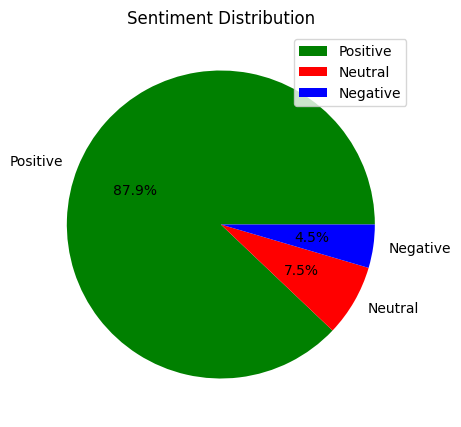

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sizes = instrument_reviews['sentiment'].value_counts()
labels = ['Positive', 'Neutral', 'Negative']
colors=['green','red','blue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors)
plt.title('Sentiment Distribution')
plt.legend()
plt.show()

**Text Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub(r'http\S+','', text)
  text = re.sub(r'@\w+|#','', text) #removing hashtags and @ symbol
  text = re.sub(r'[^\w\s]','',text) #removing punctuations
  #removing the stop words
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
instrument_reviews['reviewText'] = instrument_reviews['reviewText'].apply(data_processing)

**Stemming**

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
instrument_reviews['reviewText'] = instrument_reviews['reviewText'].apply(stemming)

**Visualizing Positive Reviews and Creating a WordCloud**

In [ ]:
pos_reviews = instrument_reviews[instrument_reviews.sentiment==2]
pos_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_count,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write exactly supposed filters pop sounds...,5.0,good,1393545600,"02 28, 2014",51,2
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product exactly quite affordablei realized dou...,5.0,Jake,1363392000,"03 16, 2013",104,2
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5.0,It Does The Job Well,1377648000,"08 28, 2013",77,2
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pops...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",35,2
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great looks performs like studio fi...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",28,2


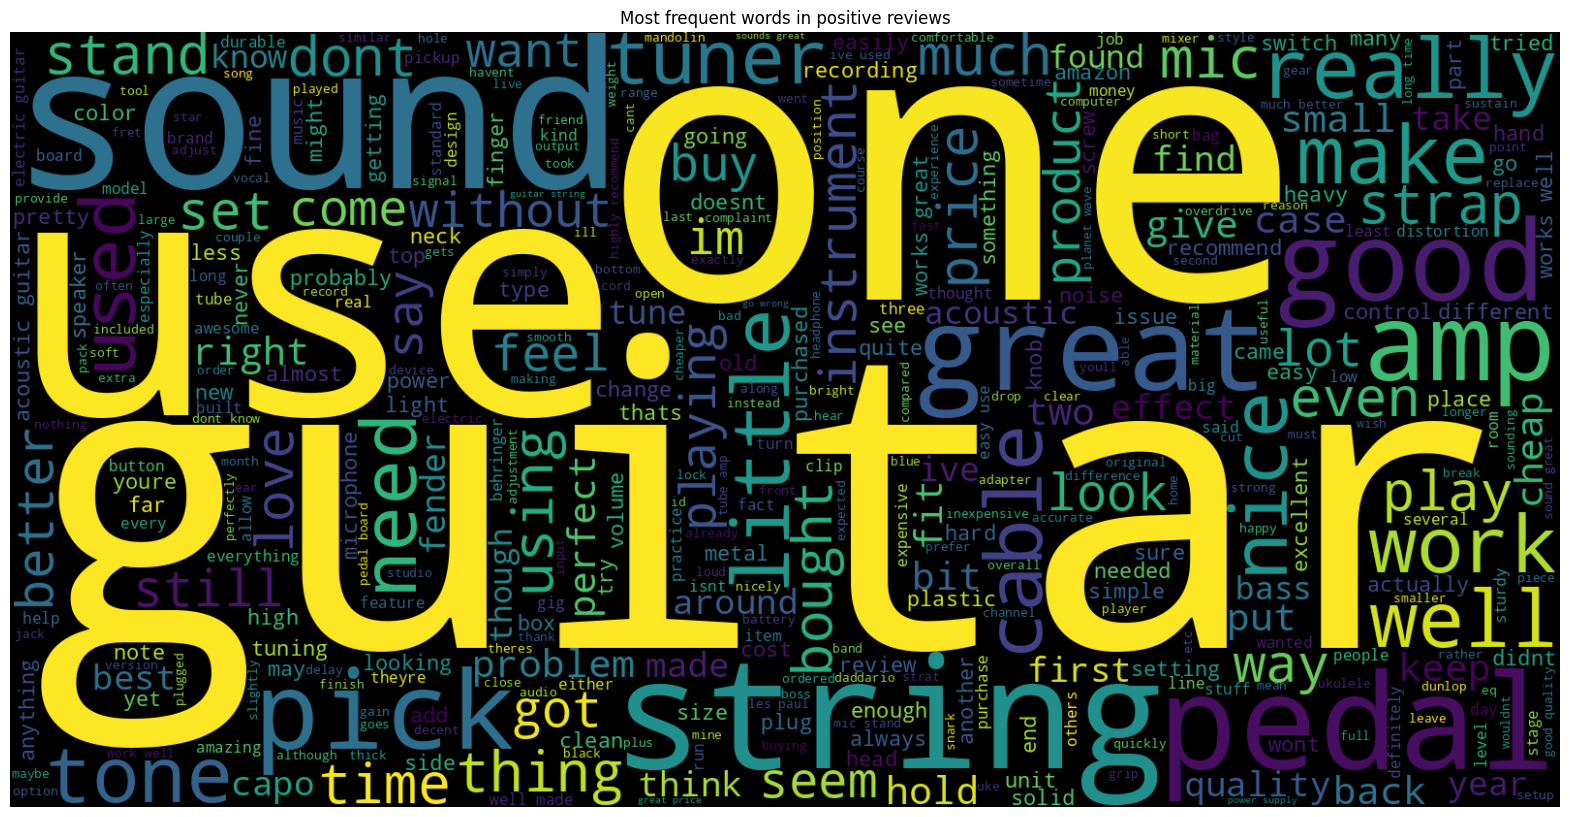

In [ ]:
text = ' '.join([word for word in pos_reviews['reviewText']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=400,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['reviewText']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('guitar', 4741),
 ('one', 3716),
 ('great', 3708),
 ('like', 3328),
 ('good', 3205),
 ('use', 3187),
 ('sound', 3043),
 ('strings', 2951),
 ('well', 2721),
 ('get', 2161),
 ('pedal', 2160),
 ('really', 1899),
 ('would', 1894),
 ('price', 1879),
 ('little', 1806)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
pos_words.columns = ['Word','Count']
pos_words.head()

,Word,Count
0,guitar,4741
1,one,3716
2,great,3708
3,like,3328
4,good,3205


In [ ]:
import plotly.express as px
px.bar(pos_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Negative Reviews and Creating a WordCloud**

In [ ]:
neg_reviews = instrument_reviews[instrument_reviews.sentiment==0]
neg_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_count,sentiment
15,A2PD27UKAD3Q00,B00005ML71,"Wilhelmina Zeitgeist ""coolartsybabe""","[0, 0]",bought use keyboard wasnt really aware options...,2.0,Definitely Not For The Seasoned Piano Player,1376697600,"08 17, 2013",115,0
50,A12ABV9NU02O29,B000068NW5,C. Longo,"[2, 2]",didnt expect cable thin easily 12 thickness gu...,2.0,Cannot recommend,1309910400,"07 6, 2011",69,0
52,A1L7M2JXN4EZCR,B000068NW5,David G,"[0, 0]",hums crackles think im problems equipment soon...,1.0,I have bought many cables and this one is the ...,1391904000,"02 9, 2014",46,0
89,A3UD50M7M72150,B000068NW5,synthezatory,"[0, 0]",im procheapo hated thing theyre noisy cables f...,1.0,Crap,1394755200,"03 14, 2014",25,0
98,A1W3CEEQBJ4GTN,B000068NZC,S. Marchuk,"[0, 0]",bought canon vixia hf g10 video camera shotgun...,2.0,Measure your damned wires before sending them...,1379289600,"09 16, 2013",189,0


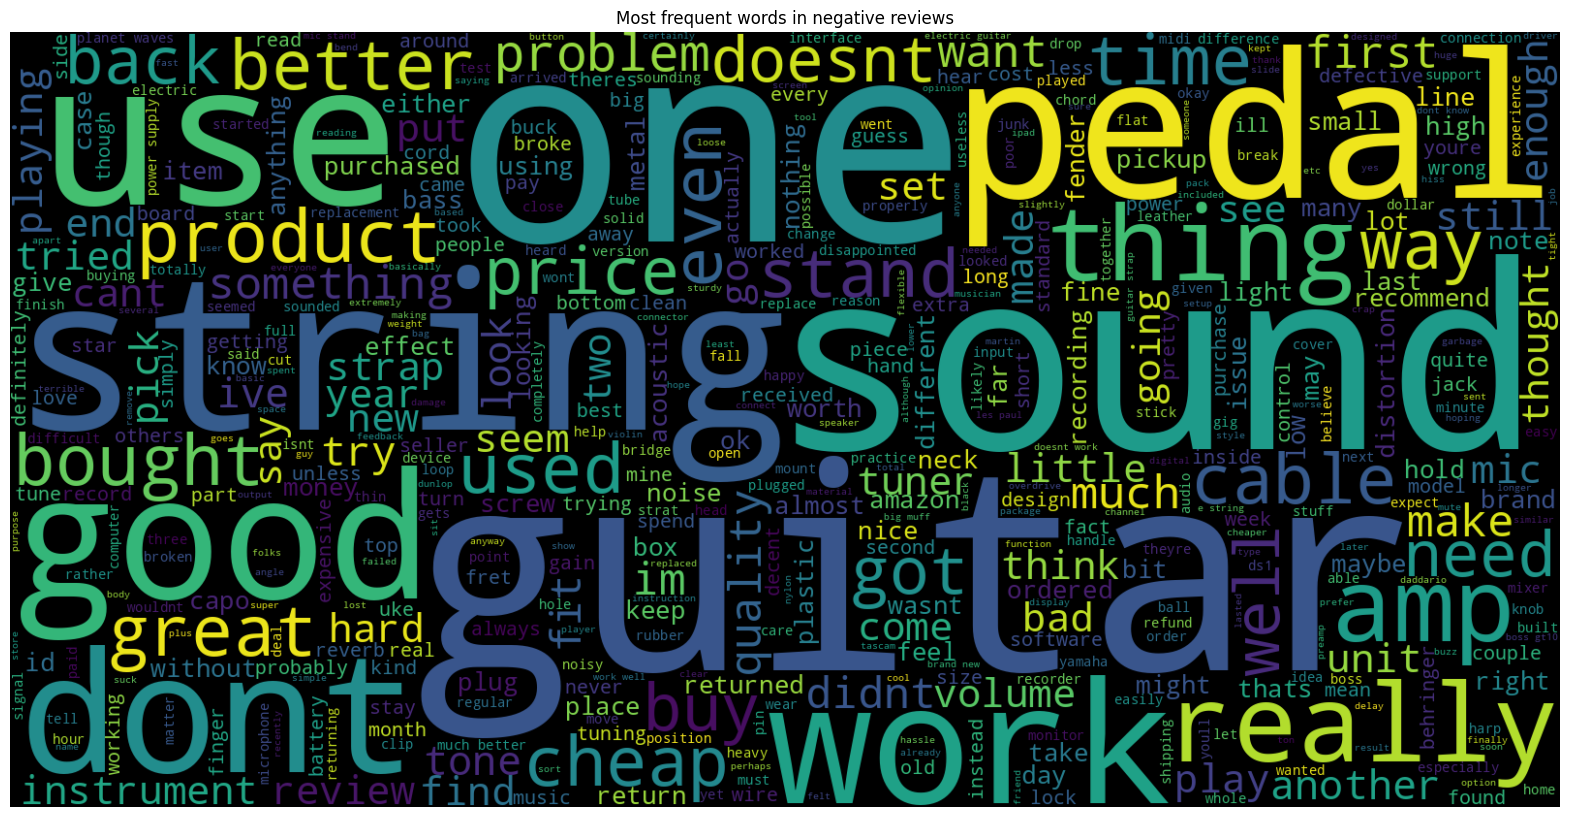

In [ ]:
text = ' '.join([word for word in neg_reviews['reviewText']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neg_reviews['reviewText']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('one', 263),
 ('guitar', 244),
 ('like', 198),
 ('get', 180),
 ('would', 173),
 ('sound', 169),
 ('use', 152),
 ('pedal', 136),
 ('good', 131),
 ('dont', 127),
 ('strings', 113),
 ('really', 111),
 ('work', 109),
 ('better', 107),
 ('even', 98)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neg_words.columns = ['Word','Count']
neg_words.head()

,Word,Count
0,one,263
1,guitar,244
2,like,198
3,get,180
4,would,173


In [ ]:
px.bar(neg_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Neutral Reviews**

In [ ]:
neutral_reviews = instrument_reviews[instrument_reviews.sentiment==1]
neutral_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,word_count,sentiment
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",use cable run output pedal chain input fender ...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012",167,1
12,A2NIT6BKW11XJQ,B00005ML71,Jai,"[0, 0]",use using large sustaining pedal playing piano...,3.0,HAS TO GET USE TO THE SIZE,1384646400,"11 17, 2013",20,1
59,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",works practice guitar instrument cable say may...,3.0,maybe not the best but it serves it's purpose,1404518400,"07 5, 2014",23,1
71,A319B090A2POEB,B000068NW5,Lee,"[0, 0]",unbalanced guitar cable notoriously noisy espe...,3.0,Standard guitar cable,1329004800,"02 12, 2012",35,1
74,A2WYAHJGST6AOT,B000068NW5,Matt,"[0, 1]",cable frills tangles pretty easy due design mi...,3.0,average cable,1393372800,"02 26, 2014",28,1


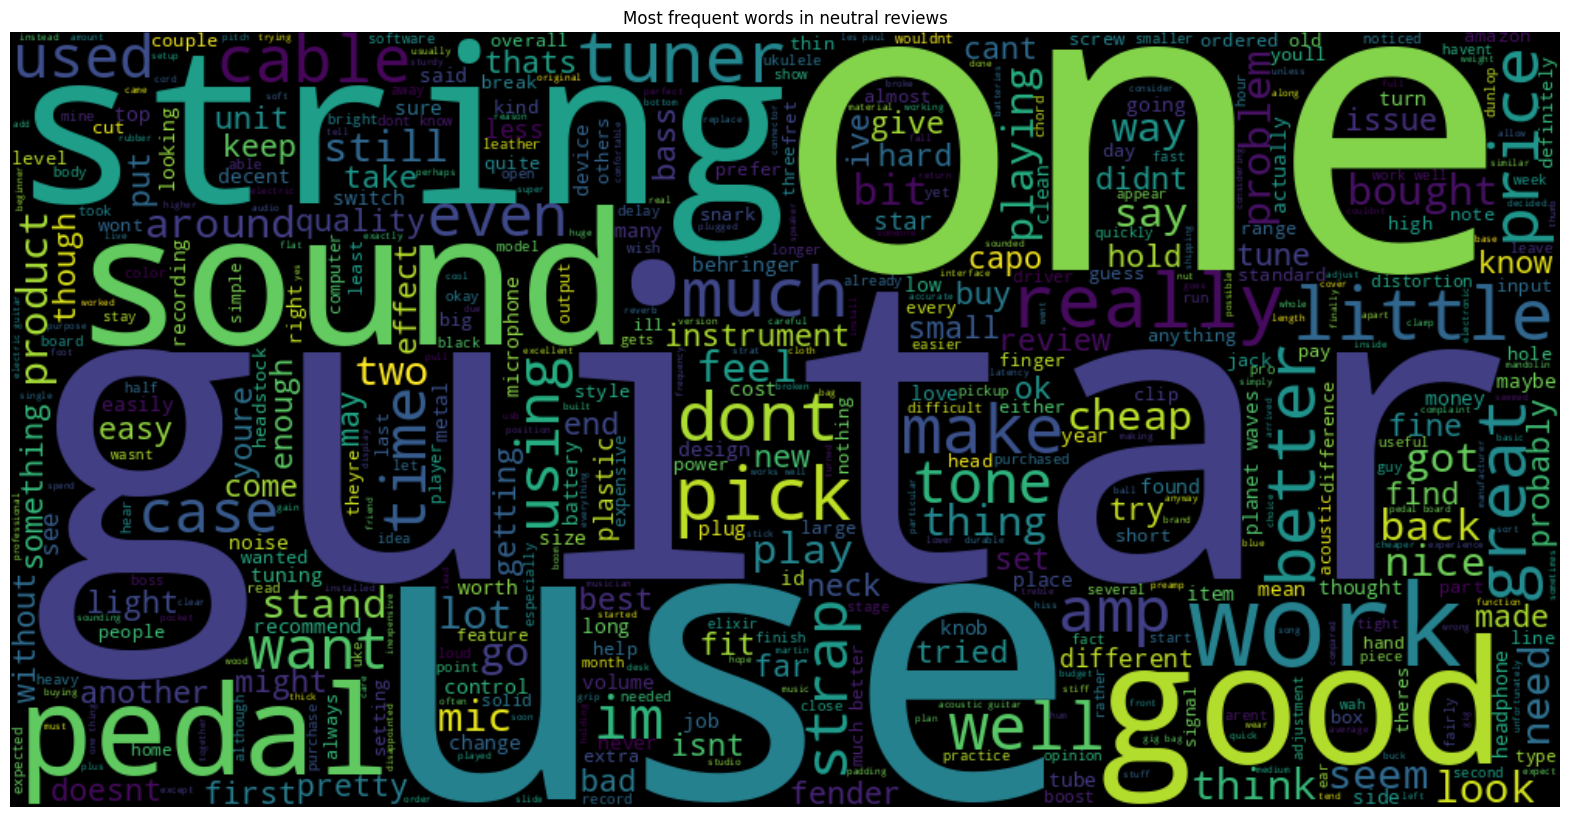

In [ ]:
text = ' '.join([word for word in neutral_reviews['reviewText']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1000,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neutral_reviews['reviewText']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('guitar', 392),
 ('one', 369),
 ('use', 364),
 ('like', 344),
 ('good', 332),
 ('get', 286),
 ('would', 284),
 ('sound', 267),
 ('strings', 256),
 ('dont', 228),
 ('much', 218),
 ('really', 211),
 ('better', 206),
 ('well', 205),
 ('pedal', 199)]

In [ ]:
neutral_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neutral_words.columns = ['Word','Count']
neutral_words.head()

,Word,Count
0,guitar,392
1,one,369
2,use,364
3,like,344
4,good,332


In [ ]:
px.bar(neutral_words,x='Count',y='Word',title='Common words in neutral reviews',color='Word')

In [ ]:
reviews_df = instrument_reviews[['reviewText', 'sentiment']]
reviews_df.head()

,reviewText,sentiment
0,much write exactly supposed filters pop sounds...,2
1,product exactly quite affordablei realized dou...,2
2,primary job device block breath would otherwis...,2
3,nice windscreen protects mxl mic prevents pops...,2
4,pop filter great looks performs like studio fi...,2


In [ ]:
x = reviews_df.drop(['sentiment'], axis=1)
y = reviews_df['sentiment']

In [ ]:
print(x.shape)
print(y.shape)


(10227, 1)
(10227,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer() #Read more about TF-IDF
x = vect.fit_transform(instrument_reviews['reviewText'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =0)

In [ ]:
print("Size of x_train: ",x_train.shape)
print("Size of x_test: ",x_test.shape)
print("Size of y_train: ",y_train.shape)
print("Size of y_test: ",y_test.shape)

Size of x_train:  (7158, 31619)
Size of x_test:  (3069, 31619)
Size of y_train:  (7158,)
Size of y_test:  (3069,)


**Creating ML Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print(logreg_acc*100)

88.49788204626914


In [ ]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print(svc_acc*100)

88.7585532746823


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
nb_acc = accuracy_score(nb_pred,y_test)
print(nb_acc*100)

88.36754643206255


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc*100)

82.40469208211144


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=decision_tree)
bagging_classifier.fit(x_train, y_train)
bagg_pred = bagging_classifier.predict(x_test)
bagg_acc = accuracy_score(bagg_pred, y_test)
print(bagg_acc*100)

87.42261322906484


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = SVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  88.56304985337243


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = LinearSVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  88.66080156402737


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC(probability = True)

voting_model = VotingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], voting = 'soft')
voting_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  88.36754643206255


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  88.36754643206255


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
svm_model = SVC()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('svm',svm_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  88.36754643206255


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
svm_model = LinearSVC()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('svm',svm_model),('lr',lr_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  88.36754643206255
